In [2]:
import numpy as np 
import h5py
import matplotlib.pyplot as plt 
import matplotlib
%matplotlib inline

In [3]:
filename = "/home/ciro/Documents/Talks/forse_dwave_channels.dat"

In [4]:
dwave_flow = np.loadtxt(filename)

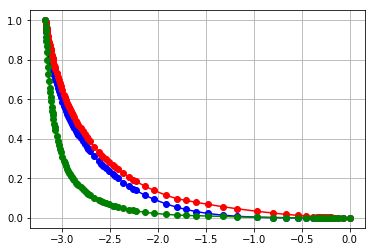

In [5]:
ax = plt.subplot()
ax.plot(np.log(dwave_flow[:,0]),dwave_flow[:,8]/np.max(dwave_flow[:,8]),'-o',color ="blue")
ax.plot(np.log(dwave_flow[:,0]),dwave_flow[:,7]/np.min(dwave_flow[:,7]),'-o',color ="red")
ax.plot(np.log(dwave_flow[:,0]),dwave_flow[:,5]/np.max(dwave_flow[:,5]),'-o',color ="green")


#ax.plot((dwave_flow[:,5]),dwave_flow[:,6],'-o',color ="blue")

ax.grid()


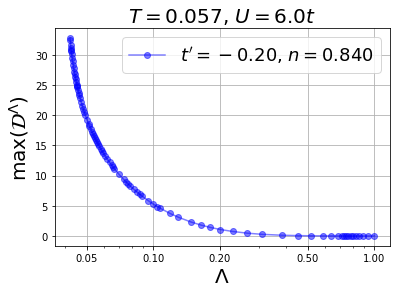

In [6]:

ax = plt.subplot()
uhubs = np.unique(dwave_flow[:,1])
betas = np.unique(dwave_flow[:,2])
tpris = np.unique(dwave_flow[:,3])
denss = np.unique(dwave_flow[:,4])
checks= {"uhubs":uhubs,"betas":betas,"trpris":tpris,"dens":denss}
for check in checks:
    #print check
    assert (len(checks[check]) ==1)
uhub,beta,tpri,dens = uhubs[0],betas[0],tpris[0],denss[0]

fs = 18 
title = r"$T="+ "{:.3f}".format(1./beta*4.)+"$, $U="+str(4.*uhub)+"t$"
label = r"$t'="+"{:.2f}".format(tpri*4.)+"$, $n="+"{:.3f}".format(dens)+"$"
ax.plot((dwave_flow[:,0]),4*dwave_flow[:,8],marker='o', color="blue",label=label,alpha =0.5)
ax.legend(fontsize = fs)
ax.set_title(title,fontsize =fs +2)
ax.set_xscale('log')
ax.set_xlabel(r"$\Lambda$",fontsize = fs+2)
ax.set_ylabel(r"$\mathrm{max}(\mathcal{D}^\Lambda)$",fontsize = fs+2)
ax.set_xticks([1.0, 0.5,0.2,0.1,0.05])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.grid()
plt.savefig('/home/ciro/Documents/Talks/dwave_flow.png',dpi=300)
#ax.xaxis.label(r"$\mathrm{max}(\mathcal{D}^\Lambda)$")

In [7]:
filename = '/home/ciro/Documents/Talks/light_dmf2rg-dat.h5'
SelfFile= h5py.File(filename,"r")
for key  in SelfFile.keys():
    print(key)
#senergy = np.array(h5py.File(filename,"r")["/DMF2RG/SelfEnergy/Im"])

DMF2RG
Parameters


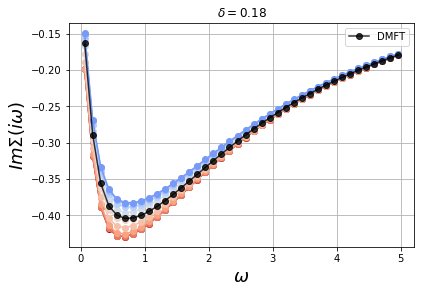

In [8]:
import matplotlib.cm as cm
filename= "/home/ciro/Documents/Talks/light_dmf2rg-dat.h5"
senergy = np.array(h5py.File(filename,"r")["/DMF2RG/SelfEnergy/Im"])
k_grid_x, k_grid_y = np.array(h5py.File(filename,"r")["DMF2RG/SelfEnergy/k_grid_x"]),np.array(h5py.File(filename,"r")["/DMF2RG/SelfEnergy/k_grid_y"])
beta = h5py.File(filename,"r")["Parameters/beta"][0]
U = h5py.File(filename,"r")["Parameters/U"][0]
tpri = h5py.File(filename,"r")["Parameters/tp"][0]
dens = h5py.File(filename,"r")["Parameters/dmft_filling"][0]
dmft_file = "/home/ciro/Documents/Talks/light_dmft.h5"
dmft_senergy = np.array(h5py.File(dmft_file,"r")["SelfEnergy/Im"])[:40]
k_grid = np.dstack((k_grid_x,k_grid_y))[0]
ax = plt.subplot()
ax.scatter(k_grid[:,0],k_grid[:,1])

for i in range(len(k_grid)):
    ax.annotate('%s'%i, xy=(k_grid[i,0],k_grid[i,1]),textcoords='data')
omarray = np.array([np.pi/beta*(2.*i+1.) for i in range(senergy.shape[1])])
plt.clf()
ax = plt.subplot() 
col = np.array([cm.coolwarm(1.-(i-33.)/(43.-33.)*0.9) for i in range(33,43)]) 

for i in range(33,43):
    ax.plot(omarray,senergy[i,:],"-o",color = col[i-33])
ax.plot(omarray,dmft_senergy,"-o",color="black",alpha=0.8,label=r"DMFT")
ax.set_xlabel(r"$\omega$",fontsize=18 )
ax.set_ylabel(r"$Im\Sigma(i\omega)$",fontsize=18)
ax.legend()
ax.grid()
plt.tight_layout() 
plt.title(r"$\delta=0.18$")
plt.savefig("/home/ciro/Documents/Talks/dmf2rg_k_senergy.png",dpi=300)

#ax.plot(omarray,senergy[33,:],"-o")

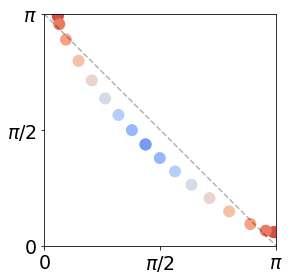

In [21]:
ax = plt.subplot()
ax.scatter(k_grid[33:43,0],k_grid[33:43,1],color=col,s=120)
ax.scatter(k_grid[33:43,1],k_grid[33:43,0],color=col,s=120)

ax.set_xlim([0,np.pi])
ax.set_ylim([0,np.pi])
points = np.arange(0,np.pi,0.01)
magline=np.pi-points
ax.plot(points,magline,'--',color='black',alpha=0.3)
ax.set_aspect('equal')
ax.set_xticks([0,np.pi/2,np.pi])
ax.set_xticklabels([r"$0$",r"$\pi/2$",r"$\pi$"],fontsize=19)
ax.set_xticks([0,np.pi/2,np.pi])
ax.set_xticklabels([r"$0$",r"$\pi/2$",r"$\pi$"],fontsize=19)
ax.set_yticks([0,np.pi/2,np.pi])
ax.set_yticklabels([r"$0$",r"$\pi/2$",r"$\pi$"],fontsize=19)
plt.tight_layout()
plt.savefig("/home/ciro/Documents/Talks/color_fs.png",dpi=300)

#plt.xticks([0,np.pi])
#plt.xtick_labe
#plt.yticks([])

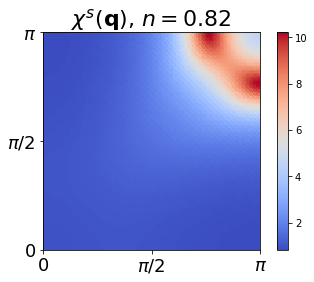

In [22]:
filename = "/home/ciro/Documents/Talks/data/n0.82/exec/suscBZ.txt"
suBZ = np.loadtxt(filename)
ax = plt.subplot()
cf = ax.pcolormesh(suBZ/4.,cmap="coolwarm")
ax.set_aspect(1.0)
ticks = [0,suBZ.shape[0]/2,suBZ.shape[0]]
tick_labels = [r"$0$",r"$\pi/2$",r"$\pi$"]
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels,fontsize =18 )
ax.set_yticks(ticks)
ax.set_yticklabels(tick_labels,fontsize=18)
plt.title(r"$\chi^s(\mathbf{q})$, $n=0.82$",fontsize=22) 
plt.colorbar(cf)
plt.savefig("/home/ciro/Documents/Talks/susc_q_0.82.png",dpi =300)



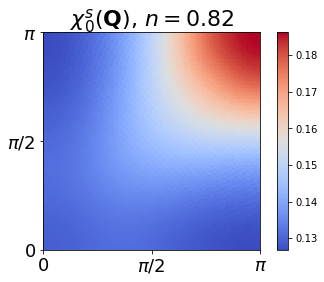

In [23]:
def plot_susc(filename,dens,outfile="/home/ciro/Documents/Talks/susc_q_"):
    plt.clf()
    suBZ = np.loadtxt(filename)
    ax = plt.subplot()
    cf = ax.pcolormesh(suBZ/4.,cmap="coolwarm")
    ax.set_aspect(1.0)
    ticks = [0,suBZ.shape[0]/2,suBZ.shape[0]]
    tick_labels = [r"$0$",r"$\pi/2$",r"$\pi$"]
    ax.set_xticks(ticks)
    ax.set_xticklabels(tick_labels,fontsize =18 )
    ax.set_yticks(ticks)
    ax.set_yticklabels(tick_labels,fontsize=18)
    plt.title(r"$\chi^s(\mathbf{q})$, $n=$"+dens,fontsize=22) 
    plt.colorbar(cf)
    plt.savefig(outfile+dens+".png",dpi =300)
def plot_bubble(filename,dens):
    plt.clf()
    suBZ = np.loadtxt(filename)
    ax = plt.subplot()
    cf =ax.pcolormesh(suBZ/4.,cmap="coolwarm")
    ax.set_aspect(1.0)
    ticks = [0,suBZ.shape[0]/2,suBZ.shape[0]]
    tick_labels = [r"$0$",r"$\pi/2$",r"$\pi$"]
    ax.set_xticks(ticks)
    ax.set_xticklabels(tick_labels,fontsize =18 )
    ax.set_yticks(ticks)
    ax.set_yticklabels(tick_labels,fontsize=18)
    plt.title(r"$\chi_0^s(\mathbf{q})$, $n=$"+dens,fontsize=22) 
    plt.colorbar(cf)
    plt.savefig("/home/ciro/Documents/Talks/bubb_q_"+dens+".png",dpi =300)


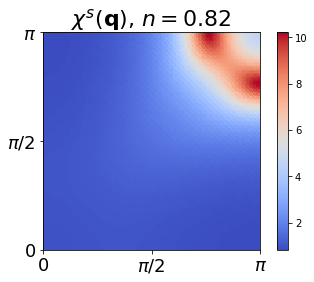

In [24]:
filename = "/home/ciro/Documents/Talks/data/n0.82/exec/suscBZ.txt"
filename_bubble = "/home/ciro/Documents/Talks/data/n0.82/exec/bubbleBZ.txt"
plot_susc(filename,"0.82")

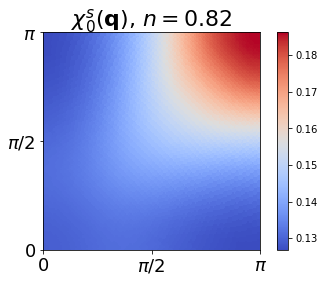

In [25]:
plot_bubble(filename_bubble,"0.82")

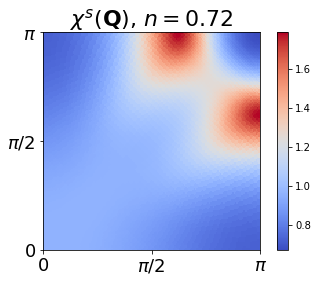

In [21]:
filename = "/home/ciro/Documents/Talks/data/n0.72/exec/suscBZ.txt"
filename_bubble = "/home/ciro/Documents/Talks/data/n0.72/exec/bubbleBZ.txt"
plot_susc(filename,"0.72")


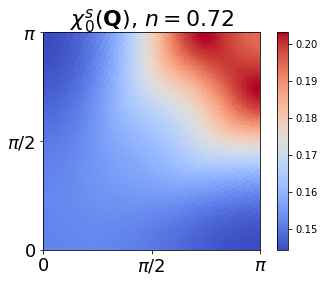

In [22]:
plot_bubble(filename_bubble,"0.72")

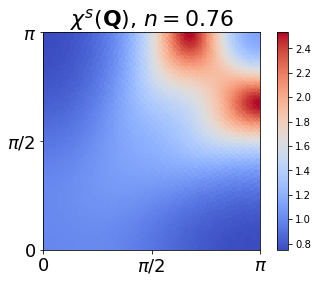

In [23]:
plot_susc("/home/ciro/Documents/Talks/data/n0.76/exec/suscBZ.txt","0.76")

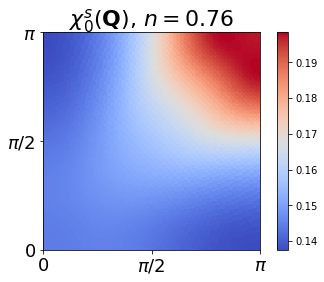

In [24]:
plot_bubble("/home/ciro/Documents/Talks/data/n0.76/exec/bubbleBZ.txt","0.76")

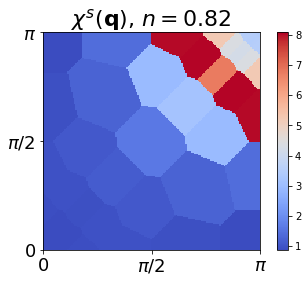

In [26]:
plot_susc("/home/ciro/Documents/Talks/chi_mag.txt","0.82","/home/ciro/Documents/Talks/dmf2rg_susc")